In [39]:
library(ggplot2)
library(tcR)
df = read.table("./kmers/test_sample/HIP00602.tsv", header = T, sep=",")
head(df)
str(df)

rearrangement,amino_acid,templates,reads,v_gene,j_gene,v_family,j_family,v_index
CCGCTCAGGCTGGAGTTGGCTGCTCCCTCCCAGACATCTGTGTACTTCTGTGCCAGCAGGAGCAATCAGCCCCAGCATTTTGGTGAT,CASRSNQPQHF,1,50,BV06-06,BJ01-05,BV06,BJ01,48
CCCCTGACCCTGGAGTCTGCCAGGCCCTCACATACCTCTCAGTACCTCTGTGCCAGCAGTGTCTACAATGAGCAGTTCTTCGGGCCA,CASSVYNEQFF,1,47,BV25-01,BJ02-01,BV25,BJ02,48
TGTACCTTGGAGATCCAGTCCACGGAGTCAGGGGACACAGCACTGTATTTCTGTGCCAGCAGCATCGGGGAGCTGTTTTTTGGAGAA,CASSIGELFF,1,46,BV21-01,BJ02-02,BV21,BJ02,51
CTACACACCCTGCAGCCAGAAGACTCGGCCCTGTATCTCTGCGCCAGCAGCCAACCCTCTGGGGCCAACGTCCTGACTTTCGGGGCC,CASSQPSGANVLTF,1,44,BV04-03,BJ02-06,BV04,BJ02,39
AGCACCTTGGAGCTGGGGGACTCGGCCCTTTATCTTTGCGCCAGCAGCCGTTGGGTTCAGGGGAACACTGAAGCTTTCTTTGGACAA,CASSRWVQGNTEAFF,1464,50624,BV05-01,BJ01-01,BV05,BJ01,36
ACCAGTGCCCATCCTGAAGACAGCAGCTTCTACATCTGCAGTGCACTACGGGACAGGGGGCTTGGTGAGACCCAGTACTTCGGGCCA,CSALRDRGLGETQYF,1456,50489,unresolved,BJ02-05,BV20,BJ02,36


'data.frame':	202265 obs. of  9 variables:
 $ rearrangement: Factor w/ 202265 levels "AAAAAACAGAATTTCCTGCTGGGGTTGGAGTCGGCTGCTCCCTCCCAAACATCTGTGTACTTCTGTGCCAGCAGGGTGAAAGGTTCG",..: 98771 96758 196069 107851 41920 24077 73580 64713 3276 139455 ...
 $ amino_acid   : Factor w/ 184309 levels "**GLARTDTQYF",..: 23599 141493 49535 113726 123771 166494 116060 71553 128084 61871 ...
 $ templates    : int  1 1 1 1 1464 1456 1436 1382 1090 5 ...
 $ reads        : int  50 47 46 44 50624 50489 49896 48093 37703 168 ...
 $ v_gene       : Factor w/ 56 levels "BV01-01","BV02-01",..: 18 50 47 7 8 56 7 29 12 5 ...
 $ j_gene       : Factor w/ 14 levels "BJ01-01","BJ01-02",..: 5 7 8 12 1 11 13 1 13 7 ...
 $ v_family     : Factor w/ 29 levels "","BV01","BV02",..: 7 24 20 5 6 19 5 8 6 5 ...
 $ j_family     : Factor w/ 2 levels "BJ01","BJ02": 1 2 2 2 1 2 2 1 2 2 ...
 $ v_index      : int  48 48 51 39 36 36 36 39 36 45 ...


In [18]:
install.packages('tcR')

also installing the dependencies ‘gridExtra’, ‘igraph’, ‘stringdist’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [19]:
library(tcR)

Loading required package: dplyr

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: gridExtra

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Loading required package: reshape2
Loading required package: igraph

Attaching package: ‘igraph’

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union


Attaching package: ‘tcR’

The following object is masked from ‘package:igraph’:

    diversity



In [26]:
entropy(df$templates, .norm = T, .do.norm = T, .laplace = 1e-12)

Warning message in check.distribution(.data, .do.norm, .laplace, .warn.zero = T):
“Warning! Sum of the input vector is NOT equal to 1. Function may produce incorrect results.
”Note: difference between the sum of the input vector and 1 is 8.88178419700125e-16, which may be caused by internal R subroutines and may not affect the result at all.



[1] 0.9440165

In [29]:
?entropy

In [73]:
v_gene_count1 = count(df, 'v_gene')
df_subs = subset(df, select = c(templates, v_gene))
df_subs$v_gene = as.factor(df_subs$v_gene)
v_gene_templates1 = aggregate(templates ~ v_gene, df_subs, sum)
v_gene_templates1 = head(v_gene_templates1, -1)
v_gene_count1 = head(v_gene_count1, -1)
v_gene_count1$count_templates = v_gene_templates1$templates
v_gene_count1
#v_gene_count$finalcount = v_gene_count$freq * v_gene_count$count_templates


v_gene,freq,count_templates
BV01-01,125,191
BV02-01,6911,11455
BV03-01,1,1
BV03-02,5,13
BV04-01,3921,7273
BV04-02,4158,8093
BV04-03,5483,12562
BV05-01,9842,15525
BV05-03,340,506
BV05-04,4328,8274


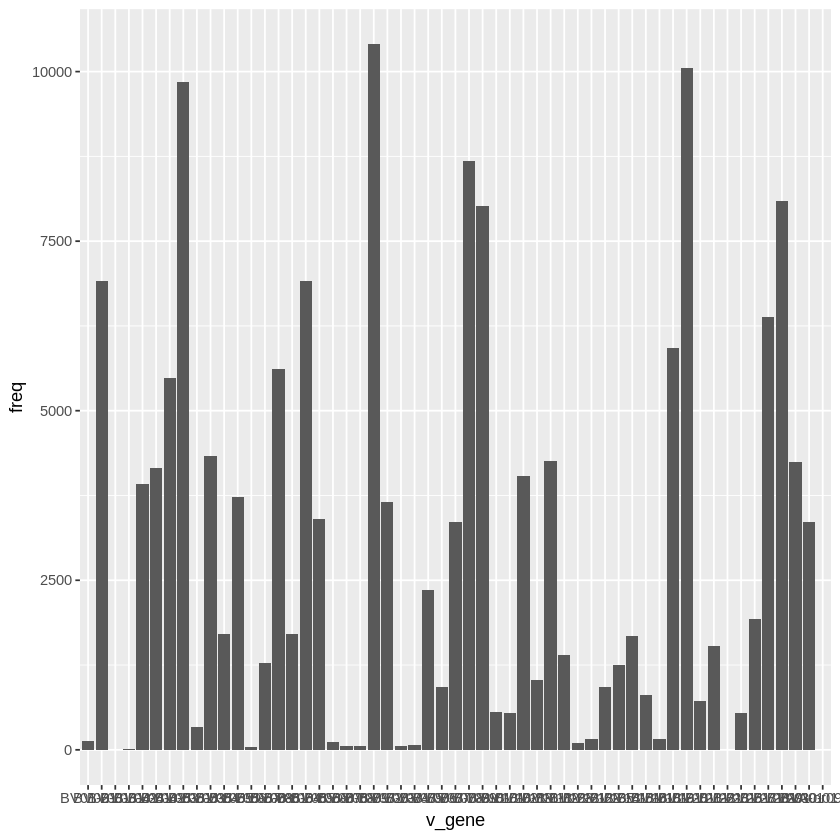

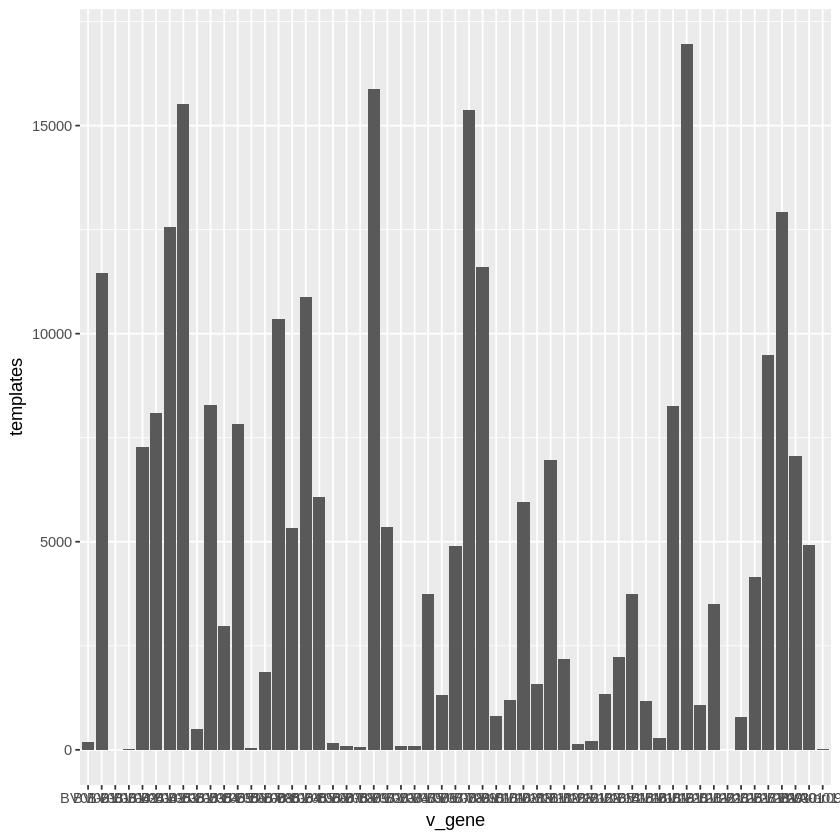

In [69]:
ggplot(v_gene_count1, aes(v_gene, freq)) +
geom_bar(stat = 'identity')
ggplot(v_gene_templates1, aes(v_gene, templates)) +
geom_bar(stat = 'identity')

In [35]:
install.packages('easycsv')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [79]:
library(easycsv)
loadcsv_multi(directory = "./kmers/test_sample",
                          extension = "CSV",
                          encoding = "Latin-1",
                          stringsAsFactors = FALSE,
                          header = TRUE,
                          quote = "\"",
                          fill = TRUE,
                          comment.char = "")
